In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.random.normal(0, 1, 1000)
X.mean(), X.std()

(0.029561183272798934, 0.9654192937522813)

(array([  2.,   5.,  37., 107., 229., 259., 194., 115.,  39.,  13.]),
 array([-3.4933061 , -2.85282152, -2.21233693, -1.57185235, -0.93136776,
        -0.29088318,  0.34960141,  0.990086  ,  1.63057058,  2.27105517,
         2.91153975]),
 <a list of 10 Patch objects>)

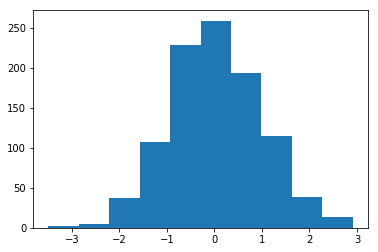

In [3]:
plt.hist(X)

In [8]:
import multiprocessing
multiprocessing.cpu_count()

4

# Some inputs on Parallell processing

In [9]:
from scipy.integrate import quad
from numpy import exp

In [11]:
def integrand(x):
    return exp(-(x)**2)
print ("integrand(1) =", integrand(1))

integrand(1) = 0.36787944117144233


In [12]:
def integral(x):
    return quad(integrand,0,x)[0]
print ("integral(1) =", integral(1))

integral(1) = 0.7468241328124271


Our benchmark will be the calculation of the integral on the segments [0,n] for n∈0,1,2,...,N

In [13]:
N = 1000
%timeit -n 10 map(integral, range(N))

549 ns ± 85.7 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Binomial Test 

In [18]:
# ! pip install statsmodels

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import proportion
sns.set_style('ticks')

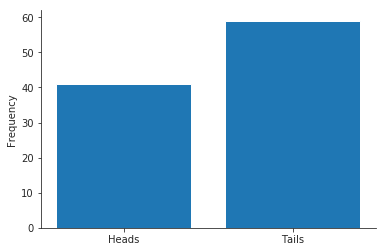

In [20]:
p = 0.45 # probability for head
n = 100
heads = (np.random.random(n) < p).sum()

fig, ax = plt.subplots()
ax.bar([0, 1], [heads, n-heads])
ax.set_xticks((0,1))
ax.set_xticklabels(('Heads', 'Tails'))
ax.set_ylabel('Frequency')
sns.despine()

In [21]:
print("P-value for two-sided biomial test for a fair coin: {:.2g}".format(
    proportion.binom_test(heads, n, prop=0.5)
))

P-value for two-sided biomial test for a fair coin: 0.089


In [22]:
min_heads, max_heads = proportion.binom_test_reject_interval(0.5, n, alpha=0.05)
min_heads, max_heads, heads

(39.0, 61.0, 41)

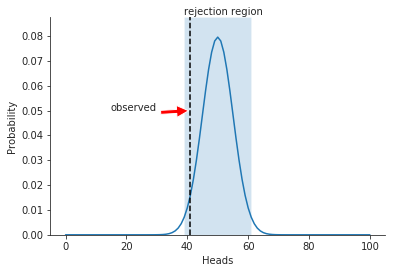

In [37]:
rv = stats.binom(n, 0.5)
max_freq = rv.pmf(n//2)
fig, ax = plt.subplots()
ax.fill_between([min_heads, max_heads], [max_freq*1.1]*2, alpha=0.2)
ax.plot(rv.pmf(np.arange(0, n+1)))
ax.axvline(heads, color='k', ls='--')
ax.annotate('rejection region', (0.4, 1.01), xycoords='axes fraction')
ax.annotate('observed', 
            (heads, 0.05), xytext=(-80, 0), 
            xycoords='data', textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
)
ax.set(
    ylim=(0, max_freq*1.1),
    xlabel='Heads',
    ylabel='Probability'
)
sns.despine()